# Stochastic RSI (STOCH RSI)

https://www.tradingview.com/wiki/Stochastic_RSI_(STOCH_RSI)#CALCULATION

https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:stochrsi

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-06-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-06-01,187.990005,190.259995,187.750000,190.240005,188.109222,23442500
2018-06-04,191.639999,193.419998,191.350006,191.830002,189.681396,26266200
2018-06-05,193.070007,193.940002,192.360001,193.309998,191.144821,21566000
2018-06-06,193.630005,194.080002,191.919998,193.979996,191.807312,20933600
2018-06-07,194.139999,194.199997,192.339996,193.460007,191.293152,21347200


In [3]:
import talib as ta

df['RSI'] = ta.RSI(df['Adj Close'], timeperiod=14)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2018-06-01,187.990005,190.259995,187.750000,190.240005,188.109222,23442500,NaN
2018-06-04,191.639999,193.419998,191.350006,191.830002,189.681396,26266200,NaN
2018-06-05,193.070007,193.940002,192.360001,193.309998,191.144821,21566000,NaN
2018-06-06,193.630005,194.080002,191.919998,193.979996,191.807312,20933600,NaN
2018-06-07,194.139999,194.199997,192.339996,193.460007,191.293152,21347200,NaN
2018-06-08,191.169998,192.000000,189.770004,191.699997,189.552856,26656800,NaN
2018-06-11,191.350006,191.970001,190.210007,191.229996,189.088135,18308500,NaN
2018-06-12,191.389999,192.610001,191.149994,192.279999,190.126358,16911100,NaN
2018-06-13,192.419998,192.880005,190.440002,190.699997,188.564056,21638400,NaN


In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2018-06-21,187.250000,188.350006,184.940002,185.460007,183.382751,25711900,35.228595
2018-06-22,186.119995,186.149994,184.699997,184.919998,182.848785,27200400,34.006310
2018-06-25,183.399994,184.919998,180.729996,182.169998,180.129608,31663100,28.570086
2018-06-26,182.990005,186.529999,182.539993,184.429993,182.364288,24569200,37.423516
2018-06-27,185.229996,187.279999,184.029999,184.160004,182.097321,25285300,36.836118


In [5]:
LL_RSI = df['RSI'].rolling(14).min()
HH_RSI = df['RSI'].rolling(14).max()

In [6]:
df['Stoch_RSI'] = (df['RSI'] - LL_RSI) / (HH_RSI - LL_RSI)
df = df.dropna()
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,RSI,Stoch_RSI
Date,,,,,,,,
2018-07-11,188.500000,189.779999,187.610001,187.880005,185.775650,18831500,49.966019,0.749868
2018-07-12,189.529999,191.410004,189.309998,191.029999,188.890366,18041100,56.792525,0.989118
2018-07-13,191.080002,191.839996,190.899994,191.330002,189.187012,12513900,57.388821,1.000000
2018-07-16,191.520004,192.649994,190.419998,190.910004,188.771713,15043100,56.219069,0.943085
2018-07-17,189.750000,191.869995,189.199997,191.449997,189.305664,15534500,57.420751,1.000000
2018-07-18,191.779999,191.800003,189.929993,190.399994,188.267410,16393400,54.299782,0.823262
2018-07-19,189.690002,192.550003,189.690002,191.880005,189.730850,20286800,57.782876,1.000000
2018-07-20,191.779999,192.429993,190.169998,191.440002,189.295776,20676200,56.406463,0.923621
2018-07-23,190.679993,191.960007,189.559998,191.610001,189.463867,15989400,56.834277,0.947361


Text(0.5,0,'Date')

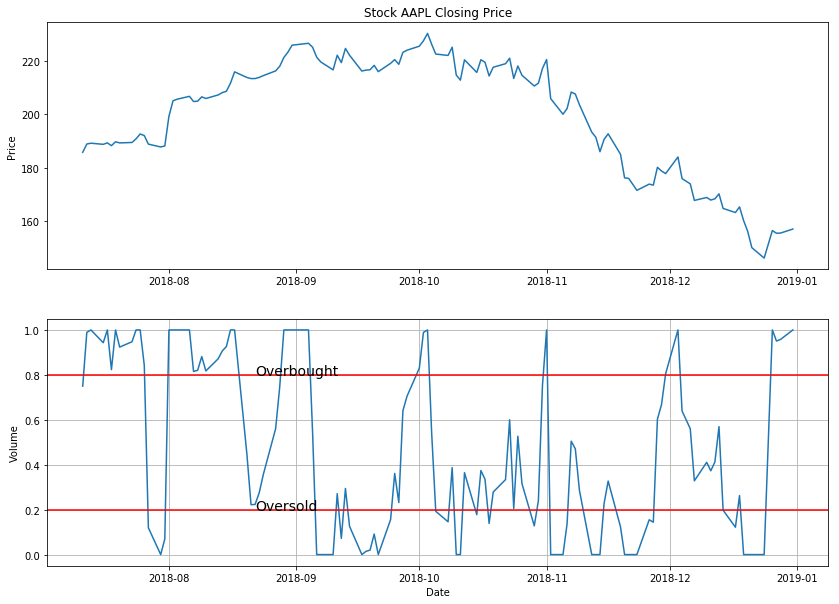

In [7]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Stoch_RSI'], label='Stoch RSI')
ax2.text(s='Overbought', x=df.RSI.index[30], y=0.8, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=0.2, fontsize=14)
ax2.axhline(y=0.8, color='red')
ax2.axhline(y=0.2, color='red')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')

## Candlestick with Stoch RSI

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,Stoch_RSI,VolumePositive
0,736886.0,188.500000,189.779999,187.610001,187.880005,185.775650,18831500,49.966019,0.749868,False
1,736887.0,189.529999,191.410004,189.309998,191.029999,188.890366,18041100,56.792525,0.989118,False
2,736888.0,191.080002,191.839996,190.899994,191.330002,189.187012,12513900,57.388821,1.000000,False
3,736891.0,191.520004,192.649994,190.419998,190.910004,188.771713,15043100,56.219069,0.943085,False
4,736892.0,189.750000,191.869995,189.199997,191.449997,189.305664,15534500,57.420751,1.000000,False


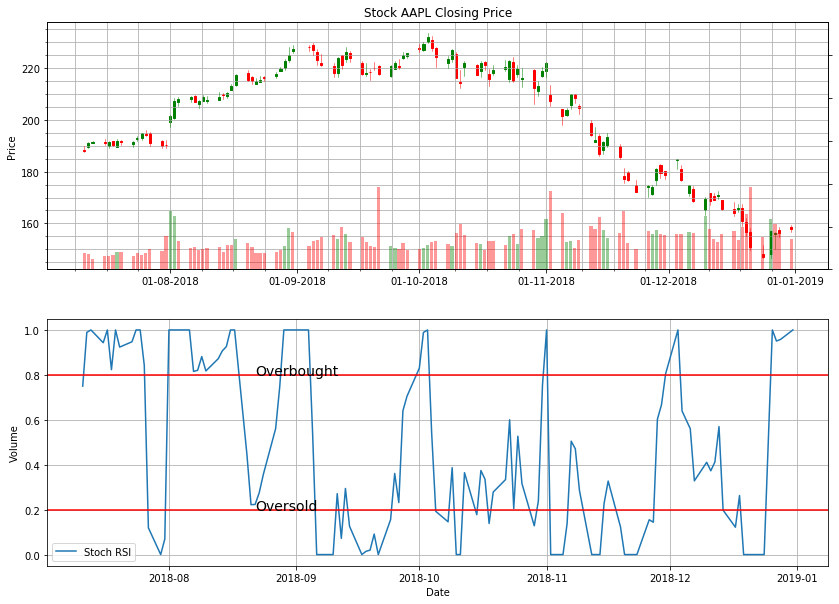

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Stoch_RSI'], label='Stoch RSI')
ax2.text(s='Overbought', x=df.RSI.index[30], y=0.8, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=0.2, fontsize=14)
ax2.axhline(y=0.8, color='red')
ax2.axhline(y=0.2, color='red')
ax2.grid()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')

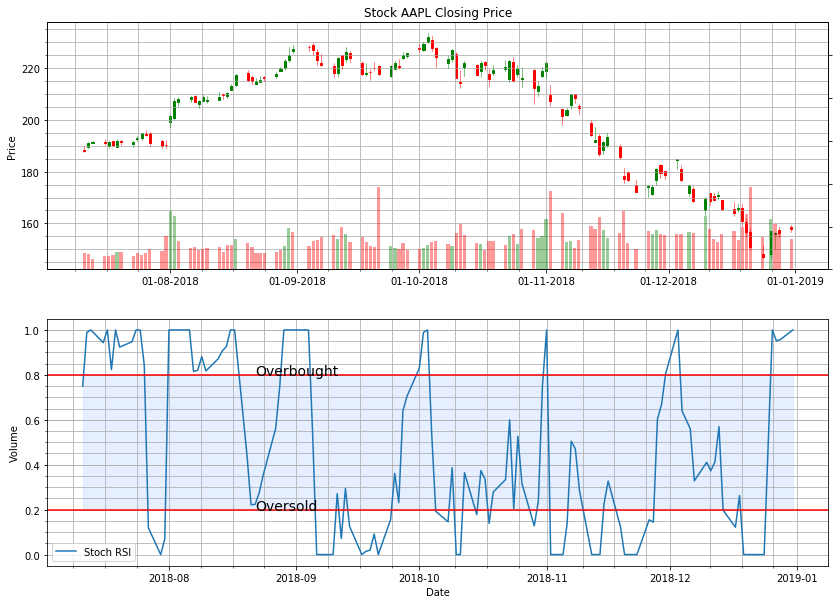

In [14]:
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Stoch_RSI'], label='Stoch RSI')
ax2.text(s='Overbought', x=df.RSI.index[30], y=0.8, fontsize=14)
ax2.text(s='Oversold', x=df.RSI.index[30], y=0.2, fontsize=14)
ax2.fill_between(df.index, y1=0.2, y2=0.8, color='#adccff', alpha='0.3')
ax2.axhline(y=0.8, color='red')
ax2.axhline(y=0.2, color='red')
ax2.grid(True, which='both')
ax2.minorticks_on()
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.legend(loc='best')